In [1]:
from annotator import Annotator
from graph_edit_distance import Label_Metrics
import graphs as gr
import networkx as nx
import numpy as np
import pandas as pd

annotator1 = Annotator('annotator1', "annotations-TBikaun.json")
annotator2 = Annotator('annotator2', "annotations-ziyu.zhao.json")
annotator3 = Annotator('annotator3', "annotations-danielsantosa.json")
annotator4 = Annotator('annotator4', "annotations-mhodki.json")
annotator5 = Annotator('annotator5', "annotations-mstewartuwa.json")
annotator6 = Annotator('annotator6', "annotations-caitlinwoods.json")
annotator7 = Annotator('annotator7', "annotations-Tim.json")
label = Label_Metrics(annotator1, annotator2, annotator3, annotator6)

In [2]:
overall_table = label.get_accumulated_table()
pivoted_dataframe = label.pivot_dataframe(overall_table)
annotator_nodes = set(pivoted_dataframe['annotator_id'])
annotator_graphs = Label_Metrics.create_annotator_graphs(pivoted_dataframe, annotator_nodes)

In [4]:
pairwise_ged = Label_Metrics.calculate_pairwise_ged(annotator_graphs, annotator_nodes)
print("Graph Edit Distance between annotators:")
print(pairwise_ged)
pairwise_reliability = Label_Metrics.calculate_pairwise_reliability(pairwise_ged, annotator_graphs)
print("Pairwise Reliability:")
print(pairwise_reliability)

overall_reliability = Label_Metrics.calculate_overall_reliability(pairwise_reliability)

Graph Edit Distance between annotators:
{('annotator2', 'annotator1'): 42.0, ('annotator2', 'annotator6'): 43.0, ('annotator2', 'annotator3'): 100.0, ('annotator1', 'annotator6'): 47.0, ('annotator1', 'annotator3'): 96.0, ('annotator6', 'annotator3'): 105.0}
Pairwise Reliability:
{('annotator2', 'annotator1'): 0.641025641025641, ('annotator2', 'annotator6'): 0.6260869565217391, ('annotator2', 'annotator3'): 0.25373134328358204, ('annotator1', 'annotator6'): 0.6083333333333334, ('annotator1', 'annotator3'): 0.3093525179856115, ('annotator6', 'annotator3'): 0.23357664233576647}


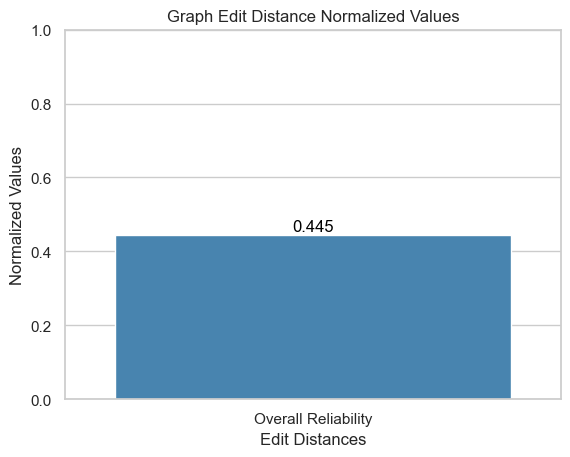

In [5]:
gr.create_bar_chart(overall_reliability, "Edit Distances", "Normalized Values","Graph Edit Distance Normalized Values")